1. 데이터 탐색 - 우리가 분석 할 데이터에 대해 전체정보 파악
2. Data Munging - 통계적 모델링에 더 적합하도록 데이터를 정리하고 재생.
3. 예측 모델링 - 실제 알고리즘 실행 
 

# Practice data set – Loan Prediction Problem


<div id="stb-box-9710" class="stb-grey_box stb-box">
<pre style="color: #7b7c75;">VARIABLE DESCRIPTIONS:
Variable	          Description
Loan_ID	                  Unique Loan ID
Gender	                  Male/ Female
Married	                  Applicant married (Y/N)
Dependents	          Number of dependents
Education	          Applicant Education (Graduate/ Under Graduate)
Self_Employed	          Self employed (Y/N)
ApplicantIncome	          Applicant income
CoapplicantIncome	  Coapplicant income
LoanAmount	          Loan amount in thousands
Loan_Amount_Term	  Term of loan in months
Credit_History	          credit history meets guidelines
Property_Area	          Urban/ Semi Urban/ Rural
Loan_Status	          Loan approved (Y/N)
</pre></div></div>

# Exploratory analysis in Python using Pandas

1.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn
import plotly 

df = pd.read_csv("train_final.csv")



2.

In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 13 columns):
Loan_ID              550 non-null object
Gender               539 non-null object
Married              547 non-null object
Dependents           536 non-null object
Education            550 non-null object
Self_Employed        522 non-null object
ApplicantIncome      550 non-null int64
CoapplicantIncome    550 non-null float64
LoanAmount           530 non-null float64
Loan_Amount_Term     539 non-null float64
Credit_History       504 non-null float64
Property_Area        550 non-null object
Loan_Status          550 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 55.9+ KB
None


gender,married,dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History 에 결측값이 존재한다.  

In [3]:
print(df.nunique())

Loan_ID              550
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      458
CoapplicantIncome    264
LoanAmount           197
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64


ApplicantIncome ,coApplicantIncome ,LoanAmount  ,LoanAmount_term 등은 연속형이다.

In [4]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
545,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
546,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
547,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
548,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
549,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df.shape

(550, 13)

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,550.000000,550.000000,530.000000,539.000000,504.000000
mean,5459.610909,1607.447127,148.066038,341.142857,0.841270
std,6327.397814,2714.338514,86.582682,66.817178,0.365787
min,150.000000,0.000000,17.000000,12.000000,0.000000
25%,2883.750000,0.000000,100.000000,360.000000,1.000000
50%,3815.000000,1239.500000,128.000000,360.000000,1.000000
75%,5817.250000,2333.000000,169.500000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Loan amount term을 제외하고 평균이 중앙값보다 커 분포과 왼쪽으로 치우쳐져있음을 알 수 있다. 즉 대부분의 자료의 수치는 작은쪽에 치우쳐져있다.

3.

In [12]:
%matplotlib inline

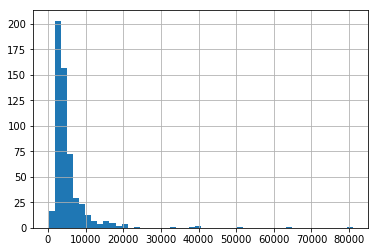

In [13]:
df['ApplicantIncome'].hist(bins=50)

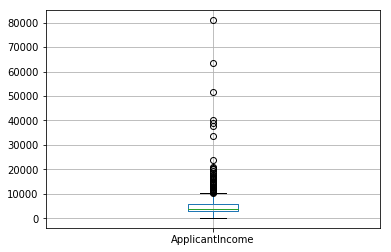

In [14]:
df.boxplot(column='ApplicantIncome')

소득은 10000달러 이하에 주로 분포하고 있으며 이상 치 / 극단 치가 존재한다. 이것은 사회의 소득 불균형 때문일 수 있으며 교육 수준과 밀접한 관계가 있을 수 있다.

이에 따라 소득을 교육수준 별로 살펴본다.

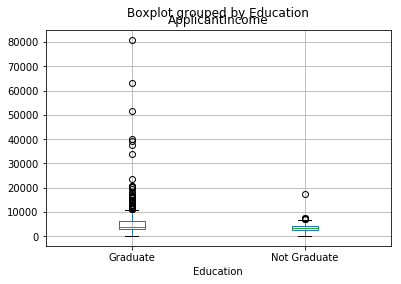

In [15]:
df.boxplot(column='ApplicantIncome', by = 'Education')

대학원생과 비 졸업생의 평균 소득간에 큰 차이가 없으나 매우 높은 수입을 가진 대학원 졸업생의 수가 더 많으며, 이는 이상 치인 것처럼 보인다.



다음으로 대출금액을 살펴본다.

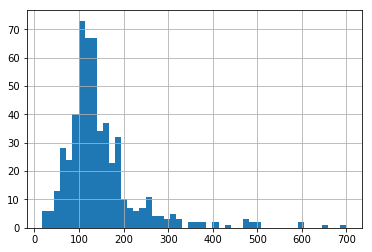

In [17]:
df['LoanAmount'].hist(bins=50)

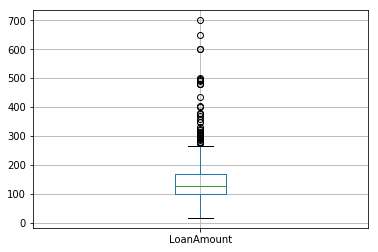

In [18]:
df.boxplot(column='LoanAmount')

loan amount도 applicant income과 같은 양상을 보인다. 평균은 130정도로 전체 범주중 하위에 속하지만 이상치가 많은 양상을 보인다.

In [ ]:
분석 할 자료에 대한 전체적인 정보

## Categorical variable analysis

In [20]:
print(df['Property_Area'].value_counts()) # 빈도분석

Semiurban    207
Urban        182
Rural        161
Name: Property_Area, dtype: int64


보유 자산은 비교적 고르게 분포되어있다.

In [21]:
print (df['Education'].value_counts())

Graduate        425
Not Graduate    125
Name: Education, dtype: int64


학력은 졸업자가 약 4배 더 많다.

In [22]:
print (df['Gender'].value_counts())

Male      445
Female     94
Name: Gender, dtype: int64


남성이 여성보다 약 5배 더 많다.

In [23]:
df['Credit_History'].value_counts()

1.0    424
0.0     80
Name: Credit_History, dtype: int64

대부분 거래기록이 존재하며 약 5배정도 거래기록이 있는 사람이 더 많다.

In [19]:
df['Loan_Status'].value_counts()

Y    381
N    169
Name: Loan_Status, dtype: int64

알고자 하는 변수인 대출승인여부는 승인 받은 사람이 약 3배 정도이다. 이는 거래기록과 상당한 연관성을 지닐것으로 예상되어 두 변수를 같이 관찰한다.

# 범주형 자료로 부터 분석 정보
-이것은 신청자가 유효한 신용 기록을 갖고 있다면 대출을받을 수있는 기회가 8 배가된다는 것을 보여줍니다.<br>
-기혼자, 자영업자, Property_Area 등으로 유사한 그래프를 그릴 수 있습니다.

In [24]:
contingency_table=pd.crosstab(df['Credit_History'], df['Loan_Status'])
contingency_table

Loan_Status,N,Y
Credit_History,,
0.0,73,7
1.0,83,341


거래기록이 있는 경우가 대출승인 받을 확률이 훨씬 높은것으로 보인다.

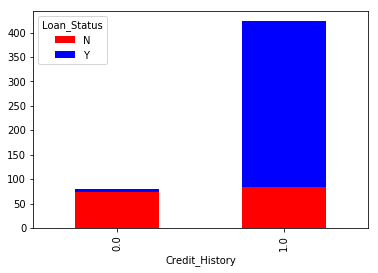

In [25]:
temp3 = pd.crosstab(df['Credit_History'], df['Loan_Status'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

 신청자가 유효한 신용 기록을 갖고 있다면 대출을받을 수있는 기회가 8 배가된다는 것을 다음 그래프로 확인할수 있다. 즉 credit history는 모델 설정시 유의하게 봐야하는 변수이다.

# Data Munging in Python : Using Pandas

1.일부 변수에 에는 결측 값이 있습니다.<br>
2.ApplicantIncome과 LoanAmount는 양쪽 끝에 극단 값을 포함하는 것으로 보입니다.<br>
3.그들을 적절한 방법으로 대처해야 니다.

[Reference](https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/)

결측값이 존재하는 변수는 다음과 같다.

#다음 작업은 다른 방식으로 진행하였습니다.
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True) # 결측 값을 평균으로 채우기

앞에서 유의하게 살펴본 대출금액 변수는 교육수준과 고용여부와 깊은 관련성이 있을것으로 예상되어 교차표를 작성해 탐색하여보았다. 

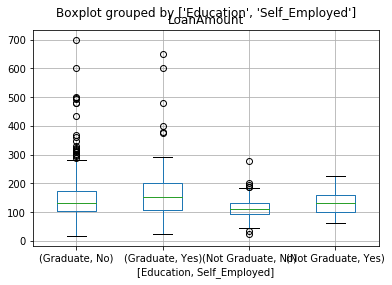

In [28]:
df.boxplot(column='LoanAmount', by = ['Education', 'Self_Employed'])

각 그룹별 평균은 차이가 있으나 큰 차이를 보여주고 있지는 않다. 대학원을 졸업하고 고용되어있는 그룹의 대출금액이 제일 높으며 대학원을 졸업하지 않고, 고용또한 되어있지 않은 그룹의 대출금액이 제일 낮은 양상을 보여준다. 특이한점은 대학원 졸업자 그룹에서 이상치가 많이 존재한다는 것이다. 이는 Education 변수가 유의한 영향을 끼친다고 볼수 있다.

탐색 이전에 Self_Employed변수의 결측값을 채운다.

## 범주형자료 결측값 채우기

In [29]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender               11
Married               3
Dependents           14
Education             0
Self_Employed        28
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     11
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

gender,married,dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History에 결측값이 존재한다. 

In [30]:
df['Self_Employed'].value_counts()

No     449
Yes     73
Name: Self_Employed, dtype: int64

Self_Employed의 경우 고용되지 않은 사람이 약 7배이므로 결측값을 no로 지정한다. 

In [31]:
df['Self_Employed'].fillna('No',inplace=True)

이후 탐색을 통해 LoanAmount의 결측값을 채운다.

In [32]:
table = df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,132.0,113.0
Yes,153.5,131.0


In [34]:
df['LoanAmount'] = df.groupby(['Education','Self_Employed'])['LoanAmount'].apply(lambda x: x.fillna(x.median()))

교육수준과 고용여부로 그룹화해 각 그룹의 LoanAmount평균을 도출한다. 결측값이 속하는 그룹에 도출한 평균을 매칭해 채워넣는다.

In [35]:
df['LoanAmount'].isnull().sum(axis = 0) #들어간거 확인

0

결측값이 이제는 없는 것을 확인할수 있다.

 gender/ married /dependents/ loan amount term/ credit history의 결측값을 채워넣는다.

gender, married, loan_amount_term의 경우 결측값 자체가 적기때문에 최빈값으로 결측값을 채워 넣는다.

In [38]:
pd.value_counts(df["Gender"].values)

Male      445
Female     94
dtype: int64

In [39]:
df['Gender'].fillna('Male', inplace=True) # Replace missing values

In [40]:
pd.value_counts(df["Married"].values)

Yes    359
No     188
dtype: int64

In [41]:
df['Married'].fillna('Yes', inplace=True) # Replace missing values

In [42]:
pd.value_counts(df["Loan_Amount_Term"].values)

360.0    454
180.0     42
480.0     15
300.0     13
240.0      4
84.0       3
120.0      3
36.0       2
60.0       2
12.0       1
dtype: int64

In [43]:
df['Loan_Amount_Term'].fillna(360.0, inplace=True) # Replace missing values

In [44]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID               0
Gender                0
Married               0
Dependents           14
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       46
Property_Area         0
Loan_Status           0
dtype: int64

결측값이 잘 들어간것을 확인할 수 있다.

In [45]:
pd.value_counts(df["Dependents"].values)

0     301
2      95
1      92
3+     48
dtype: int64

결측값이 잘 들어간것을 확인할 수 있다. 남은 dependents의 경우 Married변수와 깊은 상관관계가 있을 것으로 추론할수 있다.이에 결혼을 했으면 자식이 있는것(중간값인 1)로 넣고, 결혼을 하지 않았으면 자식이 없는것(0)으로 채워넣는다.

In [46]:
for x in df['Married']:
    if x=='No': 
        df['Dependents'].fillna('0',inplace=True)
    else:
        df['Dependents'].fillna('1',inplace=True)

credit history의 경우 앞에서 살펴보았듯 loan_status와 관련이 있으므로 대출승인이 났으면 거래기록이 있는것으로, 대출승인이 거절되었으면 거래기록이 없는것으로 결측값을 채워넣는다.

In [47]:
for x in df['Loan_Status']:
    if x=='Y': 
        df['Credit_History'].fillna('1',inplace=True)
    else:
       df['Credit_History'].fillna('0',inplace=True)

In [48]:
df.apply(lambda x: sum(x.isnull()),axis=0) 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

결측값이 이제 없음을 확인 할 수 있다.

### 6 극한값 처리

# How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

이상치에는 특정 원인이 있을수 있기 때문에 제거 보단 log transformation을 한다.income의 경우 동반자의 수입과 같이 고려하여 totalincome이라는 새 변수를 만든다.

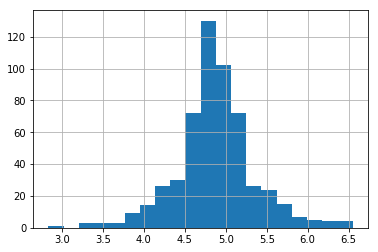

In [49]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

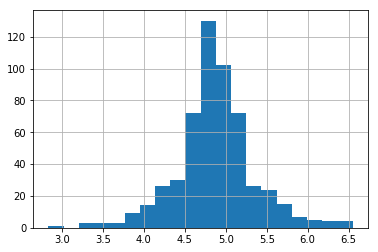

In [50]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['LoanAmount_log'].hist(bins=20) 

로그화를 하여 두 변수 모두 이전보다 치우지지 않은, 분석에 적합한 형태를 가지게 되었다.
LoanAmount_log, totalIncome_log라는 새로운 변수를 만들어 하단 분석에 사용하였다.

### 7 예측 모형에 필요한 변수의 중요도

변수 중요도의 경우 model.feature_importances를 사용하기위해 먼저 random forest 모델을 만들어 살펴본다.

# Building a Predictive Model in Python

-sklearn은 모든 입력을 숫자로 입력해야하므로 범주를 인코딩하여 모든 범주 형 변수를 숫자로 변환해야합니다.
-이 작업은 다음 코드를 사용하여 수행 할 수 있습니다.

In [51]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])
   
  #Make predictions on training set:
  predictions = model.predict(data[predictors])
    
  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print ("Accuracy : %s" % "{0:.3%}".format(accuracy))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(data.shape[0], n_folds=5)
  error = []
  for train, test in kf:
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])
    
    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]
    
    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)
    
    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))
 
  print ("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome]) 
  
  

C:\Users\LG\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



또한 분석을 위해 명목형 변수를 연속형으로 바꾸어준다.

In [52]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
   
df.dtypes 

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History        object
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
TotalIncome          float64
TotalIncome_log      float64
dtype: object

In [53]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000
mean,0.829091,0.658182,0.774545,0.227273,0.132727,5459.610909,1607.447127,147.391818,341.520000,1.038182,0.692727,4.869428,7067.058036,8.676274
std,0.376772,0.474751,1.022554,0.419452,0.339589,6327.397814,2714.338514,85.098639,66.197162,0.789501,0.461783,0.489116,6564.692067,0.542043
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,17.000000,12.000000,0.000000,0.000000,2.833213,1442.000000,7.273786
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2883.750000,0.000000,102.250000,360.000000,0.000000,0.000000,4.627412,4231.000000,8.350194
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3815.000000,1239.500000,128.000000,360.000000,1.000000,1.000000,4.852030,5422.500000,8.598312
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5817.250000,2333.000000,165.000000,360.000000,2.000000,1.000000,5.105945,7541.750000,8.928210
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,2.000000,1.000000,6.551080,81000.000000,11.302204


In [54]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,TotalIncome,TotalIncome_log
0,LP001002,1,0,0,0,0,5849,0.0,132.0,360.0,1,2,1,4.882802,5849.0,8.674026
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,4.852030,6091.0,8.714568
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,4.189655,3000.0,8.006368
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,4.787492,4941.0,8.505323
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,4.948760,6000.0,8.699515


연속형으로 자료가 바뀐것을 볼수 있다.

In [56]:
outcome_var = 'Loan_Status'

In [57]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
        'LoanAmount_log','TotalIncome_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 100.000%
Cross-Validation Score : 78.182%


예측변수를 Loan_Status로 설정하고, 모든 변수를 넣어 랜덤포레스트 모델을 만든다.

In [58]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print(featimp)

Credit_History      0.262661
TotalIncome_log     0.254702
LoanAmount_log      0.231135
Dependents          0.055415
Property_Area       0.049969
Loan_Amount_Term    0.047313
Married             0.028201
Self_Employed       0.025127
Education           0.023152
Gender              0.022326
dtype: float64


이에 따른 변수 중요도는 다음과 같다.Credit_History,TotalIncome_log,LoanAmount_log가 0.2 이상의 수치로 높게 나타나므로 위 세 변수를 중점적으로 살핀다.

### 8 로지스틱 회귀모형

회귀모형을 작성하기에 앞서 변수간 다중공선성을 없애기 위해 연속형 변수간 상관도를 살펴본다.

In [63]:
df[['TotalIncome_log','LoanAmount_log','Loan_Amount_Term','Credit_History']].corr()

,TotalIncome_log,LoanAmount_log,Loan_Amount_Term
TotalIncome_log,1.000000,0.685321,-0.039971
LoanAmount_log,0.685321,1.000000,0.113566
Loan_Amount_Term,-0.039971,0.113566,1.000000


TotalIncome_log와  LoanAmount_log간에 상관도가 약 0.7로 다중공선성이 존재할 가능성이 있다. 즉 가족의 수입이 많으면 대출금액 또한 높은 양의 상관관계가 있다.따라서 두 변수는 한 모델안에 들어가지 않도록 조정한다. 나머지 변수간의 상관관계는 미미하다고 볼수 있어 무시하였다.

In [59]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.273%
Cross-Validation Score : 81.273%


먼저 가장 영향력이 클것으로 예상되는 credit history만 넣어 모델을 만들어본다. 정확도와 교차검증점수가 81% 이상으로 정확도 또한 높고 과적합 또한 일어나지 않은것으로 보인다. 

In [64]:
predictor_var = ['Credit_History','Education','Married','Self_Employed','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.273%
Cross-Validation Score : 81.273%


다음은 명목형 변수를 넣어 모델은 만들어 본 결과이다. Credit_History만 넣은 모델과 정확도와 교차검증점수가 일치하는 것을 볼수 있다. 이는 Credit_History의 영향력이 커 다른 변수의 영향력이 무시된 결과이다.

앞 변수중요도 부분에서 유의하게 본 세변수 중 상관도가 높은 두 변수는 떨어트려 모델을 만들어본다. 

In [67]:
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.273%
Cross-Validation Score : 81.273%


In [70]:
predictor_var = ['Credit_History','TotalIncome_log','Loan_Amount_Term']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.273%
Cross-Validation Score : 81.273%


이때에도 앞 모델과 정확도와 교차검증점수가 동일하다. 이에 로지스틱 모델을 자세히 살펴보아 각 모델별 변수의 유의성을 살펴본다.

### model1

In [72]:
indvars=['Credit_History','Loan_Amount_Term','LoanAmount_log']
outcome_var='Loan_Status'
X=df[indvars]
y=df[outcome_var]

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.474222
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      547
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Jun 2018   Pseudo R-squ.:                  0.2313
Time:                        17:12:58   Log-Likelihood:                -260.82
converged:                       True   LL-Null:                       -339.30
                                        LLR p-value:                 8.308e-35
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Credit_History       3.6610      0.393      9.317      0.000       2.891       4.431
Loan_Amount

credit history와 LoanAmount_log가 유의하게 도출되었다. 이를 model1로 명명한다.

범주형 변수를 최종모델에 넣기 위해, 모든 범주형 변수를 넣어 자세한 변수의 유의성을 살펴본다. 이는 하단의 작업이다.

In [73]:
indvars=['Credit_History','Dependents','Education','Married','Self_Employed','Property_Area']
outcome_var='Loan_Status'
X=df[indvars]
y=df[outcome_var]

#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.512241
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      544
Method:                           MLE   Df Model:                            5
Date:                Wed, 20 Jun 2018   Pseudo R-squ.:                  0.1697
Time:                        17:14:33   Log-Likelihood:                -281.73
converged:                       True   LL-Null:                       -339.30
                                        LLR p-value:                 3.377e-23
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     2.0179      0.210      9.621      0.000       1.607       2.429
Dependents       

 Credit_History,Education,Property_Area가 유의하게 도출되었다. 위 두 모델의 결과를 이용해 Credit_History','Education','Property_Area','LoanAmount_log를 넣은 모델을 살펴본다.

### model2

In [74]:
indvars=['Credit_History','Education','Property_Area','LoanAmount_log']
outcome_var='Loan_Status'
X=df[indvars]
y=df[outcome_var]

#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470732
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      546
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jun 2018   Pseudo R-squ.:                  0.2369
Time:                        17:17:48   Log-Likelihood:                -258.90
converged:                       True   LL-Null:                       -339.30
                                        LLR p-value:                 1.240e-34
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     3.6572      0.392      9.318      0.000       2.888       4.426
Education        

Credit_History,Education ,LoanAmount_log 이 유의하게 도출되었다.

### 9. Decision Tree , Random Forest

Decision tree

로지스틱 회귀모형에서 만든 model1,model2를 이용해 의사결정나무로 실행하여 본다.

In [75]:
#모델1 
model = DecisionTreeClassifier(max_depth=3)
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.636%
Cross-Validation Score : 80.364%


In [76]:
#모델2
model = DecisionTreeClassifier(max_depth=3)
predictor_var = ['Credit_History','Education','Property_Area','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.455%
Cross-Validation Score : 80.727%


로지스틱의 모형보다 정확도느 조금더 높으나, 교차검증점수가 더 낮다. 교차검증점수가 더 높은 model2의 의사결정나무 결과를 살펴본다.

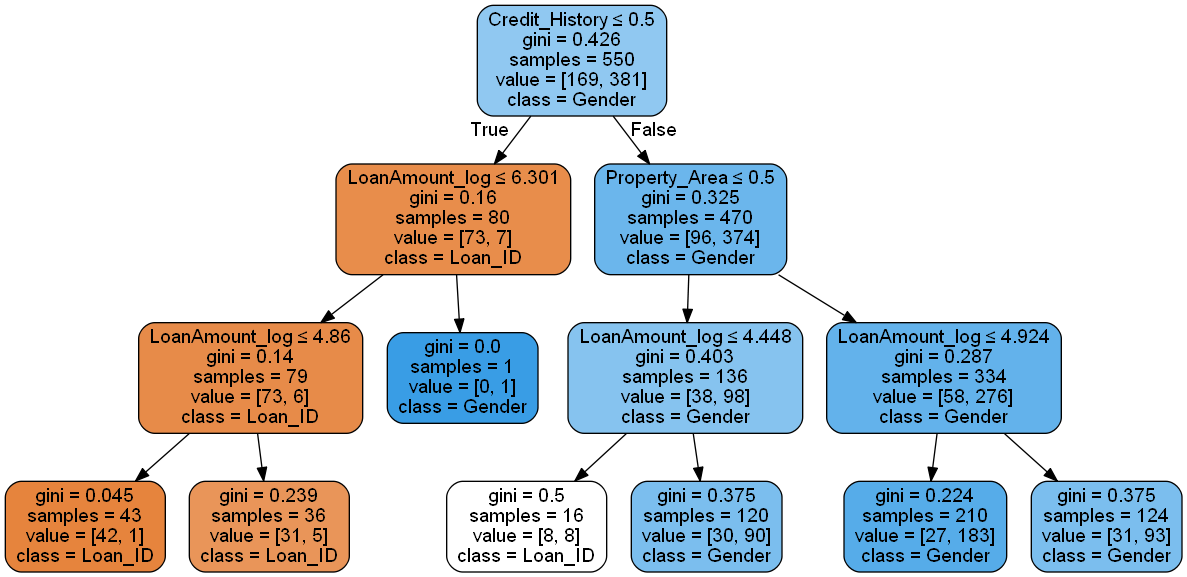

In [77]:
import os     

os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(model, out_file=None, feature_names=['Credit_History','Education','Property_Area','LoanAmount_log'],
                          class_names=df.columns, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
#model column만 바꿈

의사결정나무 모형에 따르면 대출승인은 거래기록이 0.5보다 작을경우 즉 거래기록이 일어나지 않았을경우, 로그화한 대츨 금액이 6.3을 넘지 않을때 이루어 질것으로 예상된다.

random forest

In [78]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.909%
Cross-Validation Score : 80.545%


In [79]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History','Loan_Amount_Term','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 82.364%
Cross-Validation Score : 80.545%


In [80]:
model = RandomForestClassifier(n_estimators=25, min_samples_split=25, max_depth=7, max_features=1)
predictor_var = ['Credit_History','Education','Property_Area','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.636%
Cross-Validation Score : 80.545%


model1과 model2, 추가적으로 'TotalIncome_log','LoanAmount_log','Credit_History','Dependents','Property_Area'를 넣은 모델을 돌려보았을때 정확도가 좀더 높은 모델도 있으나 교차검증점수가 낮아 적합하지않다.

### 10. 세가지 모형중 가장 적합한 모델

세가지 모형중 가장 적합한 모델은 가장 정확하고 overfitting 되지 않은 model2 logistic 모형이다.

In [81]:
indvars=['Credit_History','Education','Property_Area','LoanAmount_log']
outcome_var='Loan_Status'
X=df[indvars]
y=df[outcome_var]

#from scipy import stats
#stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import statsmodels.api as sm
logit_model=sm.Logit(y,X.astype(float))
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.470732
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  550
Model:                          Logit   Df Residuals:                      546
Method:                           MLE   Df Model:                            3
Date:                Wed, 20 Jun 2018   Pseudo R-squ.:                  0.2369
Time:                        17:44:59   Log-Likelihood:                -258.90
converged:                       True   LL-Null:                       -339.30
                                        LLR p-value:                 1.240e-34
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Credit_History     3.6572      0.392      9.318      0.000       2.888       4.426
Education        

In [82]:
outcome_var = 'Loan_Status'
model = LogisticRegression()
predictor_var = ['Credit_History','Education','Property_Area','LoanAmount_log']
classification_model(model, df,predictor_var,outcome_var)

Accuracy : 81.273%
Cross-Validation Score : 81.273%


이 경우 정확도가 높으며 교차검증점수도 정확도와 동일하여 overfitting이 일어나지 않았다.

In [84]:
model.intercept_, model.coef_

(array([-0.17725419]),
 array([[ 3.22413469, -0.44598354,  0.11632054, -0.35609065]]))

도출된 모형식은 다음과 같다.


$$
 ln(\frac{p}{1-p}) = -0.17725419+3.22413469x + -0.44598354x(1)+0.11632054x(2) + -0.35609065x(3)
$$


즉 신용기록이 있는 사람이 없는 사람보다 대출받을 확률이 3.22배 더 높으며 고학력자인 사람이 저학력자보다 대출 받을 확률은 0.44배 이며, 소유한 땅이 도시에있는 경우가 대출 받을 확률이 -0.11배 이고, 대출금액이 더 많은 사람이 대출받을 확률이 -0.35배 이다.  